# Chapter 05 Modeling Distributions

In [1]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt

import nsfg
import first
import analytic

import thinkstats2
import thinkplot

from IPython.core import page
page.page = print

The distributions we have used so far are called **empirical distributions** because they are based on empirical observations, which are necessarily finite samples.

The alternative is an **analytic distribution**, which is characterized by a CDF that is a mathematical function. 

Analytic distributions can be used to model empirical distributions.

In this context, a **model** is a simplification that leaves out unneeded details. This chapter presents common analytic distributions and uses them to model data from a variety of sources.

## Exponential distribution

We’ll start with the exponential distribution because it is relatively simple. The CDF of the exponential distribution is

$CDF(x) = 1 - e^{\lambda x}$

The parameter, $\lambda$, determines the shape of the distribution. Figure shows what this CDF looks like with $\lambda$ = 0.5, 1, and 2.

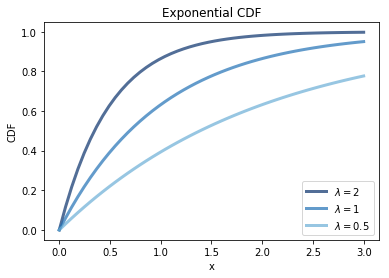

In [2]:
thinkplot.PrePlot(3)
for lam in [2.0, 1, 0.5]:
    xs, ps = thinkstats2.RenderExpoCdf(lam, 0, 3.0, 50) # low, high, number of points to render
    label = r'$\lambda=%g$' % lam
    thinkplot.Plot(xs, ps, label=label)
    
thinkplot.Config(title='Exponential CDF', xlabel='x', ylabel='CDF', loc='lower right')

In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called **interarrival** times.

If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

As an example, we will look at the *interarrival* time of births. On December 18, 1997, 44 babies were born in a hospital in Brisbane, Australia. The time of birth for all 44 babies was reported in the local paper; the complete dataset is in a file called babyboom.dat

Here's the distribution of interarrival times from a dataset of birth times.

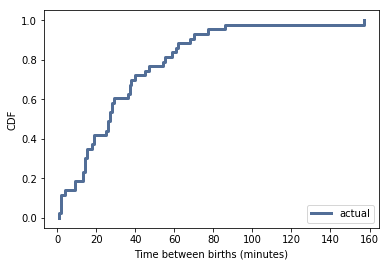

In [3]:
df = analytic.ReadBabyBoom()
diffs = df.minutes.diff() # minutes is the time of birth converted to minutes since midnight
cdf = thinkstats2.Cdf(diffs, label='actual')

thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Time between births (minutes)', ylabel='CDF')

In [4]:
df.head()

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [5]:
# 64 - 5 = 59
# 78 - 64 = 14
diffs.head()

0     NaN
1    59.0
2    14.0
3    37.0
4    62.0
Name: minutes, dtype: float64

`ReadBabyBoom` reads the data file and returns a DataFrame with columns time, sex, weight_g, and minutes, where *minutes is the time of birth converted to minutes since midnight*.

`diffs` is the difference between consecutive birth times, and `cdf` is the distribution of these interarrival times. Figure above shows the CDF. It seems to have the general shape of an exponential distribution, but how can we tell?

One way is to plot the complementary CDF, which is 1 - CDF(x), on a log-y scale. 

For data from an exponential distribution, the result is a straight line. Let’s see why that works.

If you plot the complementary CDF (CCDF) of a dataset that you think is exponential, you expect to see a function like:

$y \approx e ^{\lambda x}$

Taking the log of both sides yields:

$log (y) \approx \lambda x$

So on a log-y scale the CCDF is a straight line with slope $-\lambda$.

Here's what the CCDF looks like on a log-y scale.  A straight line is consistent with an exponential distribution.

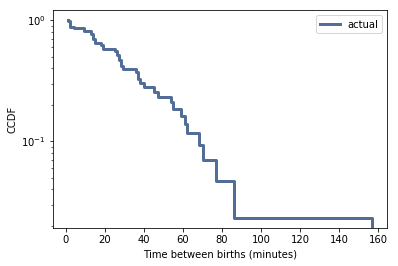

In [6]:
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='Time between births (minutes)',
                 ylabel='CCDF', yscale='log', loc='upper right')

With the argument `complement=True`, `thinkplot.Cdf` computes the complementary CDF before plotting. And with `yscale=’log’`, `thinkplot.Show` sets the y axis to a logarithmic scale.

It is not exactly straight, which indicates that the exponential distribution is not a perfect model for this data. Most likely the underlying assumption—that a birth is equally likely at any time of day—is not exactly true. Nevertheless, it might be reasonable to model this dataset with an exponential distribution.

With that simplification, we can summarize the distribution with a single parameter.

The parameter, $\lambda$, can be interpreted as a rate; that is, the number of events that occur, on average, in a unit of time.

In this example, 44 babies are born in 24 hours, so the rate is $\lambda = 0.0306$ births per minute. The mean of an exponential distribution is $\frac{1}{\lambda}$, so the mean time between births is 32.7 minutes.

We are using the expectation of an exponential distribution after evaluating the data and fitting an exponential model to it. This is the reason why we did the above verification - to check if exponential distribution can be used, and then use the formula for its expectation/mean.

In [7]:
44 / (24*60)

0.030555555555555555

In [8]:
1/0.0306

32.67973856209151

## Normal distribution

The normal distribution, also called Gaussian, is commonly used because it describes many phenomena, at least approximately. It turns out that there is a good reason for its ubiquity, which we will get to in “Central Limit Theorem”.

The normal distribution is characterized by two parameters: the mean, $\mu$, and standard deviation $\sigma$. The normal distribution with $\mu = 0$ and $\sigma = 1$ is called the standard normal distribution.

Its CDF is defined by an integral that does not have a closed form solution, but there are algorithms that evaluate it efficiently. 

One of them is provided by `SciPy`:
`scipy.stats.norm` is an object that represents a normal distribution; it provides a method, cdf, that evaluates the standard normal CDF:

In [9]:
import scipy.stats
scipy.stats.norm.cdf(0)

0.5

This result is correct: the median of the standard normal distribution is 0 (the same as the mean), and half of the values fall below the median, so CDF(0) is 0.5.

`norm.cdf` takes optional parameters: `loc`, which specifies the mean, and `scale`, which specifies the standard deviation.

`thinkstats2` makes this function a little easier to use by providing EvalNormalCdf, which takes parameters mu and sigma and evaluates the CDF at x:

`
def EvalNormalCdf(x, mu=0, sigma=1):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)
`

Figure below shows CDFs for normal distributions with a range of parameters. 

The sigmoid shape of these curves is a recognizable characteristic of a normal distribution.

Notice the CDFs are centered around their means. The standard deviation controls the width of the CDF.

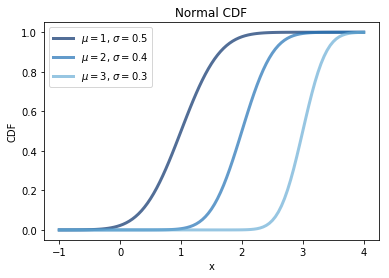

In [10]:
thinkplot.PrePlot(3)

mus = [1.0, 2.0, 3.0]
sigmas = [0.5, 0.4, 0.3]
for mu, sigma in zip(mus, sigmas):
    xs, ps = thinkstats2.RenderNormalCdf(mu=mu, sigma=sigma, low=-1.0, high=4.0)
    label = r'$\mu=%g$, $\sigma=%g$' % (mu, sigma)
    thinkplot.Plot(xs, ps, label=label)

thinkplot.Config(title='Normal CDF', xlabel='x', ylabel='CDF',
                 loc='upper left')

We'll use a normal model to fit the distribution of birth weights from the NSFG.

Figure shows the empirical CDF of weights for all live births and the CDF of a normal distribution with the same mean and variance.

The normal distribution is a good model for this dataset, so if we summarize the distribution with the parameters $\mu = 7.28$ and $\mu = 1.24$, the resulting error (difference between the model and the data) is small.

In [11]:
preg = nsfg.ReadFemPreg()
weights = preg.totalwgt_lb.dropna()

Here's the observed CDF and the model.  The model fits the data well except in the left tail. 

Below the 10th percentile there is a discrepancy between the data and the model; there are more light babies than we would expect in a normal distribution. 

If we are specifically interested in preterm babies, it would be important to get this part of the distribution right, so it might not be appropriate to use the normal model.

Mean, Var 7.280883100022579 1.5452125703544901
Sigma 1.2430657948614345


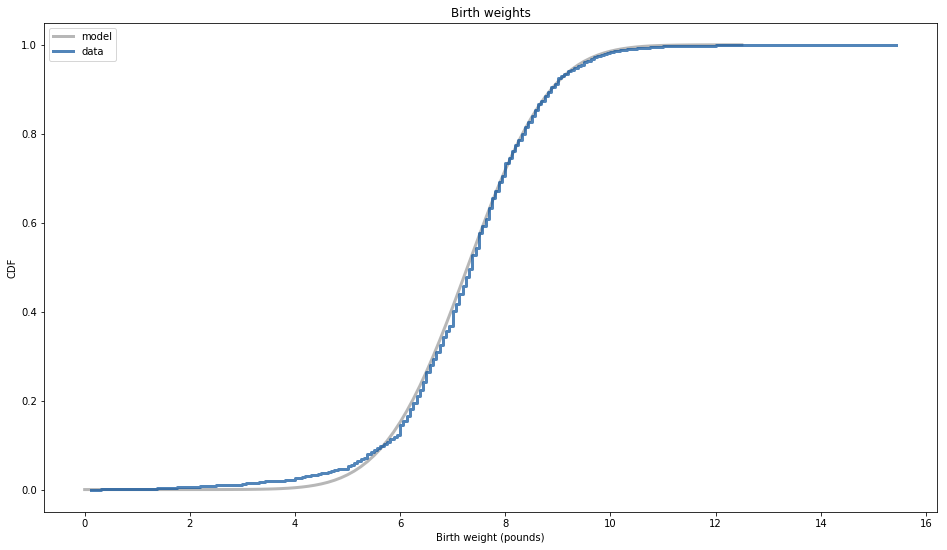

In [12]:
plt.figure(figsize=(16,9))
# estimate parameters: trimming outliers yields a better fit
# Calculate the mean and variance of weights after removing 1% of data from each end
mu, var = thinkstats2.TrimmedMeanVar(weights, p=0.01) # remove 1% of values from each end
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=12.5)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(weights, label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 

thinkplot.Config(title='Birth weights',
                 xlabel='Birth weight (pounds)',
                 ylabel='CDF')

## Normal Probability Plot

For the exponential distribution, and a few others, there are simple transformations we can use to test whether an analytic distribution is a good model for a dataset.

For the normal distribution there is no such transformation, but there is an alternative called a normal probability plot. There are two ways to generate a normal probability plot: the hard way and the easy way. Here’s the easy way:

1. Sort the values in the sample.
2. From a standard normal distribution ($\mu = 0$ and $\sigma = 1$), generate a random sample with the same size as the sample, and sort it.
3. Plot the sorted values from the sample versus the random values.

A normal probability plot is a visual test for normality.  The following example shows that if the data are actually from a normal distribution, the plot is approximately straight.

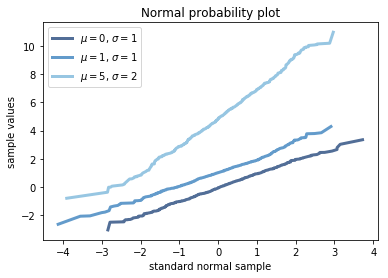

In [13]:
n = 1000
thinkplot.PrePlot(3) 

mus = [0, 1, 5]
sigmas = [1, 1, 2]

for mu, sigma in zip(mus, sigmas):
    sample = np.random.normal(mu, sigma, n) # dummy data from a real normal distribution for testing
    xs, ys = thinkstats2.NormalProbability(sample)
    label = '$\mu=%d$, $\sigma=%d$' % (mu, sigma)
    thinkplot.Plot(xs, ys, label=label)

thinkplot.Config(title='Normal probability plot',
                 xlabel='standard normal sample',
                 ylabel='sample values')

If the distribution of the sample is approximately normal, the **result is a straight line with intercept `mu` and slope `sigma`.** `thinkstats2` provides `NormalProbability`, which takes a sample and returns two NumPy arrays:

`xs, ys = thinkstats2.NormalProbability(sample)`

`ys` contains the sorted values from sample; `xs` contains the random values from the standard normal distribution.

We are generating fake data by getting 1000 random samples from a real normal distributions. Then we are passing this data into `NormalProbability` which gives us the same sample sorted back, and same number of samples from a standard normal distribution.

To test `NormalProbability` we generated some fake samples that were actually drawn from normal distributions with various parameters.

The lines are approximately straight, with values in the tails deviating more than values near the mean.

Now let’s try it with real data.

Here's the normal probability plot for birth weights, showing that the lightest babies are lighter than we expect from the normal mode, and the heaviest babies are heavier.

It plots a gray line that represents the model and a blue line that represents the data.

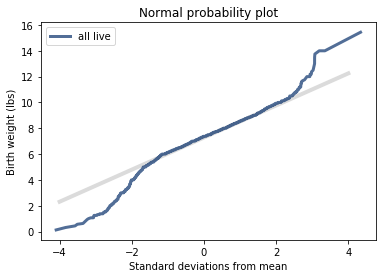

In [14]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std) # range, intercept, slope
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label='all live')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Birth weight (lbs)')

`FitLine` takes a sequence of `xs`, an intercept, and a slope; it returns `xs` and `ys` that represent a line with the given parameters, evaluated at the values in `xs`.

`NormalProbability` returns `xs` and `ys` that contain values from the standard normal distribution and values from weights. If the distribution of weights is normal, the data should match the model.

If we suspect that the deviation in the left tail is due to preterm babies, we can check by selecting only full term births.

In [15]:
full_term = preg[preg.prglngth >= 37]
term_weights = full_term.totalwgt_lb.dropna()

Now the deviation in the left tail is almost gone, but the heaviest babies are still heavy.

Figure below shows the results for all live births, and also for full term births (pregnancy length greater than 37 weeks). Both curves match the model near the mean and deviate in the tails.

When we select only full term births, we remove some of the lightest weights, which reduces the discrepancy in the lower tail of the distribution.

This plot suggests that the normal model describes the distribution well within a few standard deviations from the mean, but not in the tails. Whether it is good enough for practical purposes depends on the purposes.

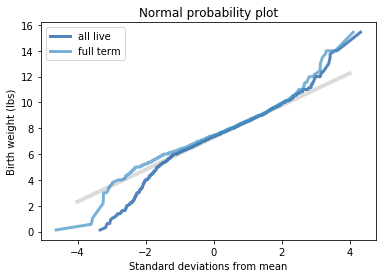

In [16]:
mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

thinkplot.PrePlot(2) 
xs, ys = thinkstats2.NormalProbability(weights)
thinkplot.Plot(xs, ys, label='all live')

xs, ys = thinkstats2.NormalProbability(term_weights)
thinkplot.Plot(xs, ys, label='full term')
thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Birth weight (lbs)')

## The lognormal Distribution

*If the logarithms of a set of values have a normal distribution, the values have a lognormal distribution.*

The CDF of the lognormal distribution is the same as the CDF of the normal distribution, with log x substituted for x.

$CDF_{lognormal(x)} = CDF_{normal} (log (x))$

The parameters of the lognormal distribution are usually denoted $\mu$ and $\sigma$. But remember that these parameters are not the mean and standard deviation; the mean of a lognormal distribution is $e^{(\mu + \frac{\sigma^2}{2})}$ and the standard deviation is [beautiful](https://en.wikipedia.org/wiki/Log-normal_distribution).

If a sample is approximately lognormal and you plot its CDF on a log-x scale, it will have the characteristic shape of a normal distribution. To test how well the sample fits a lognormal model, you can make a normal probability plot using the log of the values in the sample.

As an example of a lognormal disrtribution, let’s look at the distribution of adult weights from the BRFSS, which is approximately lognormal.

The National Center for Chronic Disease Prevention and Health Promotion conducts an annual survey as part of the Behavioral Risk Factor Surveillance System (BRFSS).

In 2008, they interviewed 414,509 respondents and asked about their demographics, health, and health risks. Among the data they collected are the weights in kilograms of 398,484 respondents.

The repository for this book contains CDBRFS08.ASC.gz, a fixed-width ASCII file that contains data from the BRFSS, and brfss.py, which reads the file and analyzes the data.

In [17]:
import brfss
df = brfss.ReadBrfss()
weights = df.wtkg2.dropna()

In [18]:
weights.head()

0     70.91
1     72.73
3     73.64
4     88.64
5    109.09
Name: wtkg2, dtype: float64

The following function estimates the parameters of a normal distribution and plots the data and a normal model.

In [19]:
def MakeNormalModel(weights):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(weights, label='weights')

    mean, var = thinkstats2.TrimmedMeanVar(weights)
    std = np.sqrt(var)
    print('n, mean, std', len(weights), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

Here's the distribution of adult weights and a normal model, which is not a very good fit.

n, mean, std 398484 78.59599565702814 17.75455519179819


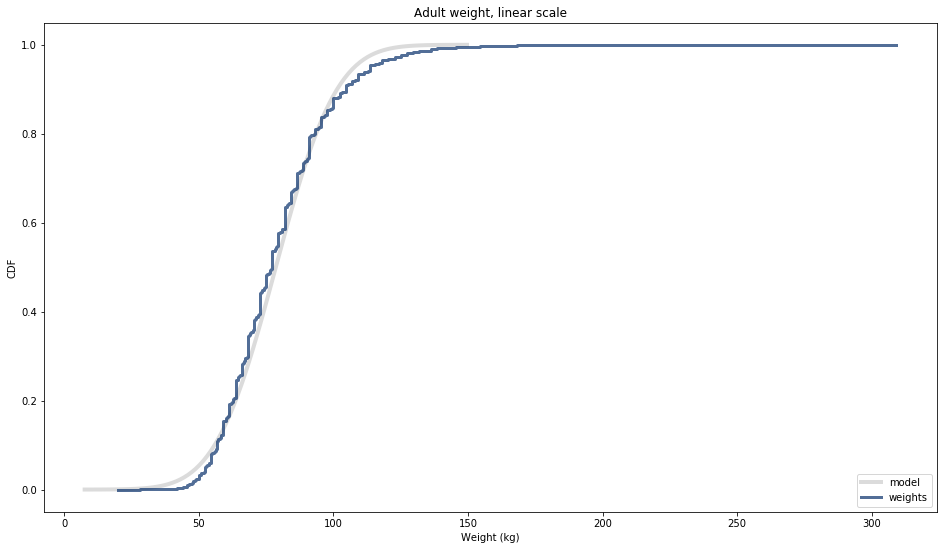

In [20]:
plt.figure(figsize=(16,9))
MakeNormalModel(weights)
thinkplot.Config(title='Adult weight, linear scale', xlabel='Weight (kg)',
                 ylabel='CDF', loc='lower right')

Figure shows the distribution of adult weights on a linear scale with a normal model.

Here's the distribution of adult weight and a lognormal model, plotted on a log-x scale.  The model is a better fit for the data, although the heaviest people are heavier than the model expects.

n, mean, std 398484 1.884660713731975 0.096235802591517


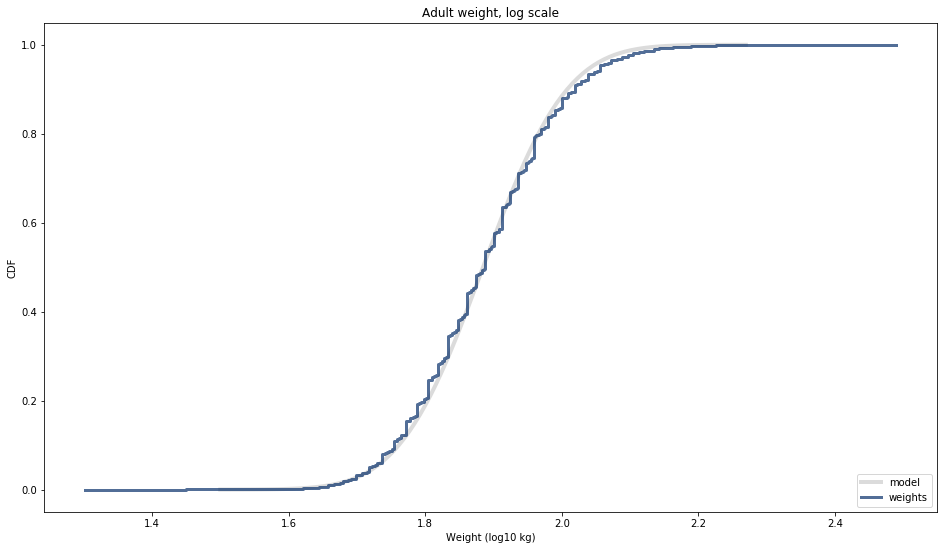

In [21]:
plt.figure(figsize=(16,9))

log_weights = np.log10(weights)

MakeNormalModel(log_weights)

thinkplot.Config(title='Adult weight, log scale', xlabel='Weight (log10 kg)',
                 ylabel='CDF', loc='lower right')

Figure shows the same distribution on a log scale with a lognormal model. The lognormal model is a better fit, but this representation of the data does not make the difference particularly dramatic.

The following function generates a normal probability plot.

In [22]:
def MakeNormalPlot(weights):
    """Generates a normal probability plot of birth weights.

    weights: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(weights, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(weights)
    thinkplot.Plot(xs, ys, label='weights')

When we generate a normal probability plot with adult weights, we can see clearly that the data deviate from the model systematically.

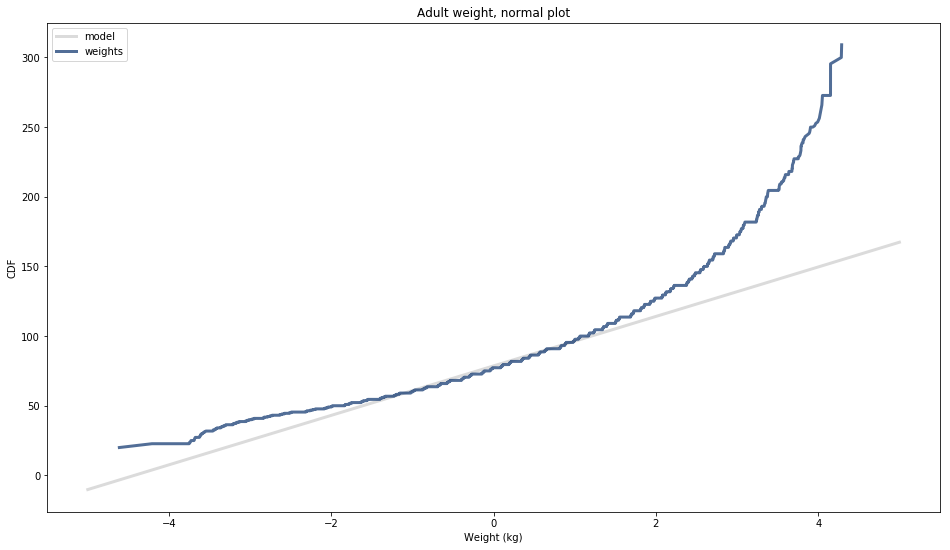

In [23]:
plt.figure(figsize=(16,9))

MakeNormalPlot(weights)

thinkplot.Config(title='Adult weight, normal plot', xlabel='Weight (kg)',
                 ylabel='CDF', loc='upper left')

If we make a normal probability plot with log weights, the model fit the data well except in the tails, where the heaviest people exceed expectations.

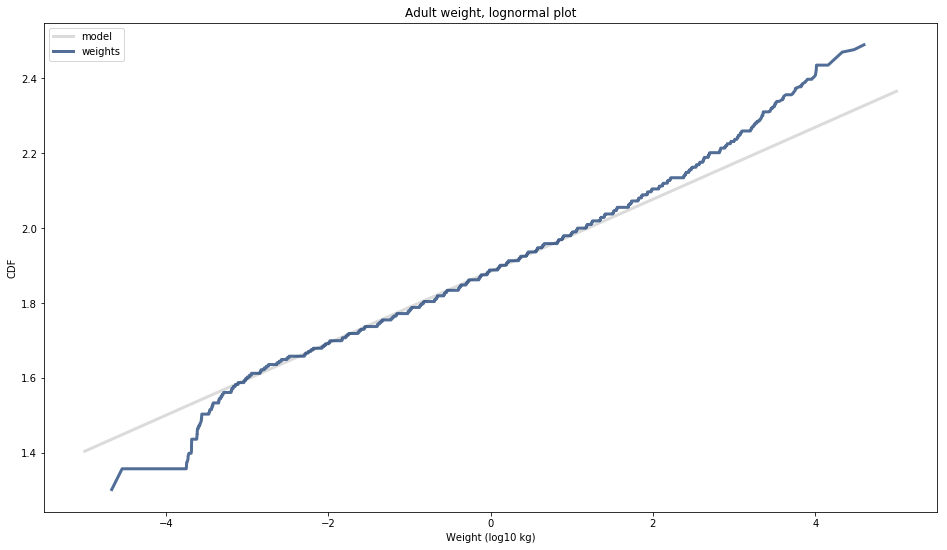

In [24]:
plt.figure(figsize=(16,9))

MakeNormalPlot(log_weights)

thinkplot.Config(title='Adult weight, lognormal plot', xlabel='Weight (log10 kg)',
                 ylabel='CDF', loc='upper left')

Now it is apparent that the data deviate substantially from the normal model. The lognormal model is a good match for the data within a few standard deviations of the mean, but it deviates in the tails.

Log straightened the curve and made it fit better with the straight line (model).

We conclude that the lognormal distribution is a good model for this data.

## Pareto distribution

The Pareto distribution is named after the economist Vilfredo Pareto, who used it to describe the distribution of wealth. Since then, it has been used to describe phenomena in the natural and social sciences including sizes of cities and towns, sand particles and meteorites, and forest fires and earthquakes.

The CDF of the Pareto distribution is:

$CDF(x) = 1 - (\frac{x}{x_m})^{-\alpha}$

The parameters $x_m$ and $\alpha$ determine the location and shape of the distribution. 

$x_m$ is the minimum possible value. Figure shows CDFs of Pareto distributions with $x_m = 0.5$ and different values of $\alpha$.

Here's what the Pareto CDF looks like with a range of parameters.

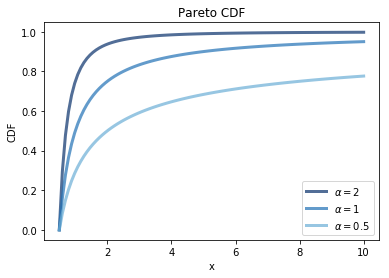

In [25]:
xmin = 0.5

thinkplot.PrePlot(3)
for alpha in [2.0, 1.0, 0.5]:
    xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, 10.0, n=100) 
    thinkplot.Plot(xs, ps, label=r'$\alpha=%g$' % alpha)
    
thinkplot.Config(title='Pareto CDF', xlabel='x',
                 ylabel='CDF', loc='lower right')

There is a simple visual test that indicates whether an empirical distribution fits a Pareto distribution: on a log-log scale, the CCDF looks like a straight line. Let’s see why that works.

If you plot the CCDF of a sample from a Pareto distribution on a linear scale, you expect to see a function like:

$y \approx 1 - (\frac{x}{x_m})^{-\alpha}$

Taking the log of both sides yields:

$log(y) \approx -\alpha (log(x) - log(x_m) ) $

$log(y) \approx -\alpha log(x) + \alpha log(x_m) $

So if you plot log y versus log x, it should look like a straight line with slope $-\alpha$ and intercept $\alpha log(x_m)$.

The distribution of populations for cities and towns is sometimes said to be Pareto-like.

As an example, let’s look at the sizes of cities and towns. The US Census Bureau publishes the population of every incorporated city and town in the United States.

We downloaded their data; it is in the repository for this book in a file named PEP_2012_PEPANNRES_with_ann.csv. The repository also contains populations.py, which reads the file and plots the distribution of populations.

In [26]:
import populations

pops = populations.ReadData()
print('Number of cities/towns', len(pops))

Number of cities/towns 19515


Here's the distribution of population for cities and towns in the U.S., along with a Pareto model.  The model fits the data well in the tail.

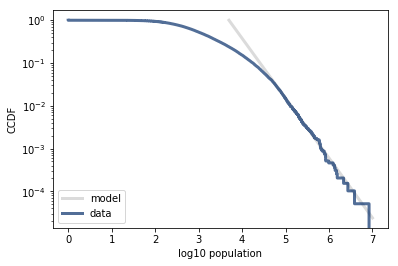

In [27]:
log_pops = np.log10(pops)

#cdf = thinkstats2.Cdf(pops, label='data')
cdf_log = thinkstats2.Cdf(log_pops, label='data')

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=5000, alpha=1.4, low=0, high=1e7)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')

Figure shows the CCDF of populations on a log-log scale. The largest 1% of cities and towns, below $10^{-2}$, fall along a straight line. So we could conclude, as some researchers have, that the tail of this distribution fits a Pareto model.

The lognormal model might be a better fit for this data (as is often the case for things that are supposed to be Pareto).

Figure below shows the CDF of populations and a lognormal model , and a normal probability plot. Both plots show good agreement between the data and the model.

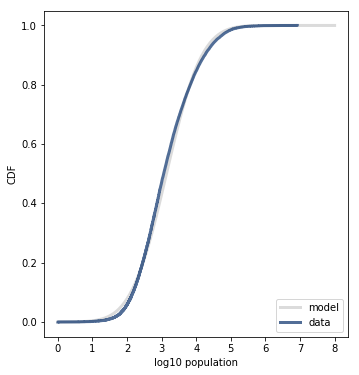

In [28]:
thinkplot.PrePlot(cols=2)

mu, sigma = log_pops.mean(), log_pops.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label='model', color='0.8')

thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CDF', loc='lower right')

Here's a normal probability plot for the log-populations.  The model fits the data well except in the right tail, where the biggest cities are bigger than expected.

Neither model is perfect. The Pareto model only applies to the largest 1% of cities, but it is a better fit for that part of the distribution. 

The lognormal model is a better fit for the other 99%. Which model is appropriate depends on which part of the distribution
is relevant.

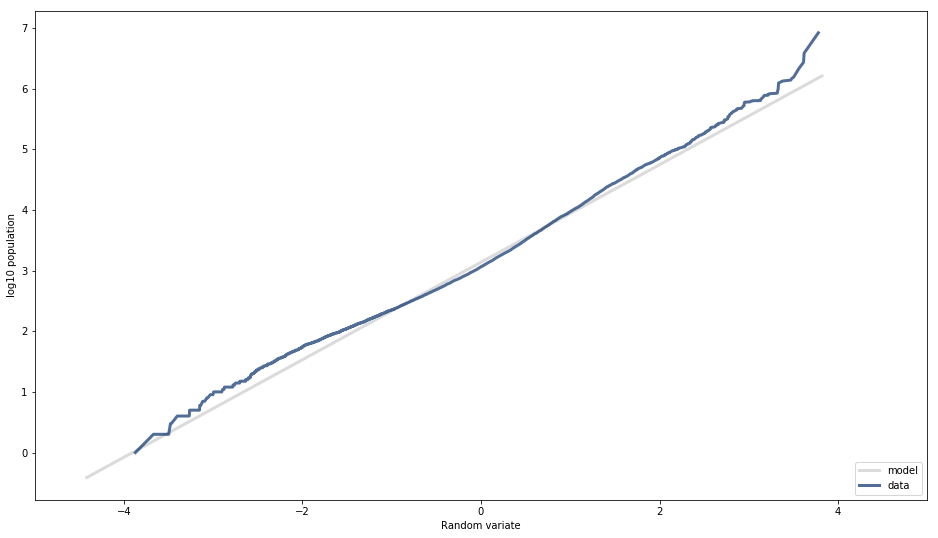

In [29]:
plt.figure(figsize=(16,9))
thinkstats2.NormalProbabilityPlot(log_pops, label='data')
thinkplot.Config(xlabel='Random variate',
                 ylabel='log10 population',
                 xlim=[-5, 5])

## Generating Random Numbers

Analytic CDFs can be used to generate random numbers with a given distribution function, p = CDF(x).

If there is an efficient way to compute the inverse CDF, we can generate random values with the appropriate distribution by choosing p from a uniform distribution between 0 and 1, and then choosing x = ICDF (p).

For example, the CDF of the exponential distribution is

$p=1-e^{\lambda x}$

Solving for x yields:

$x = - \frac{log(1 - p)}{\lambda}$


When we have an analytic CDF, we can sometimes invert it to generate random values.  The following function generates values from an exponential distribution.

In [31]:
import random

def expovariate(lam):
    p = random.random()
    x = -np.log(1-p) / lam
    return x

`expovariate` takes `lam` and returns a random value chosen from the exponential distribution with parameter `lam`.

Two notes about this implementation: We called the parameter `lam` because lambda is a Python keyword. Also, since log 0 is undefined, we have to be a little careful. The implementation of `random.random` can return 0 but not 1, so 1 - p can be 1 but not 0, so log(1-p) is always defined.

We can test it by generating a sample.

In [32]:
t = [expovariate(lam=2) for _ in range(1000)]

And plotting the CCDF on a log-y scale.

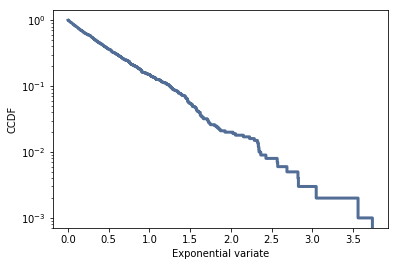

In [35]:
cdf = thinkstats2.Cdf(t)

thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='Exponential variate', ylabel='CCDF', yscale='log')

A straight line is consistent with an exponential distribution.

As an exercise, write a function that generates a Pareto variate.

## Solution
https://www.wolframalpha.com/input/?i=solve+1+-+(x%2Fm)%5E-a+for+x

$x = x_m (1-p)^{-\frac{1}{\alpha}}$

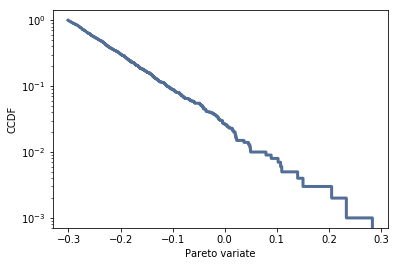

In [38]:
def paretovariate(xmin, alpha):
    p = random.random()
    x = xmin * 1/((1-p)**(1/alpha))
    return x

t = [paretovariate(xmin = 0.5, alpha=5) for _ in range(1000)]

cdf = thinkstats2.Cdf(np.log10(t))

thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='Pareto variate', ylabel='CCDF', yscale='log')

## Why Model?

> *"All models are wrong, but some are useful"* - George E. P. Box.

At the beginning, we said that many real world phenomena can be modeled with analytic distributions. “So,” you might ask, “what?”

Like all models, analytic distributions are abstractions, which means they leave out details that are considered irrelevant. For example, an observed distribution might have measurement errors or quirks that are specific to the sample; analytic models smooth out these idiosyncrasies.

Analytic models are also a form of data compression. When a model fits a dataset well, a small set of parameters can summarize a large amount of data.

It is sometimes surprising when data from a natural phenomenon fit an analytic distribution, but these observations can provide insight into physical systems. Sometimes we can explain why an observed distribution has a particular form. For example, Pareto distributions are often the result of generative processes with positive feedback (socalled preferential attachment processes).

Also, analytic distributions lend themselves to mathematical analysis.

But it is important to remember that all models are imperfect. Data from the real world never fit an analytic distribution perfectly. People sometimes talk as if data are generated by models; for example, they might say that the distribution of human heights is normal, or the distribution of income is lognormal. 

Taken literally, these claims cannot be true; there are always differences between the real world and mathematical models. Models are useful if they capture the relevant aspects of the real world and leave out unneeded details. But what is “relevant” or “unneeded” depends on what you are planning to use the model for.

## Exercises

**Exercise:** In the BRFSS, the distribution of heights is roughly normal with parameters $\mu$ = 178 cm and $\sigma$ = 7.7 cm for men, and $\mu$ = 163 cm and $\sigma$ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see https://www.blueman.com/casting). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

`scipy.stats` contains objects that represent analytic distributions

In [ ]:
import scipy.stats

For example <tt>scipy.stats.norm</tt> represents a normal distribution.

In [ ]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

A "frozen random variable" can compute its mean and standard deviation.

In [ ]:
dist.mean(), dist.std()

It can also evaluate its CDF.  How many people are more than one standard deviation below the mean?  About 16%

In [ ]:
mu-sigma

In [ ]:
# We need the sum of all the probabilities till 1 standard devation below the mean
dist.cdf(mu-sigma)

How many people are between 5'10" and 6'1"?

In [ ]:
# Solution

low = dist.cdf(177.8)    # 5'10"
high = dist.cdf(185.4)   # 6'1"
low, high, high-low

**Exercise:** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters $x_m = 1$ m and $\alpha = 1.7$, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

`scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters $\alpha = 1.7$ and $x_{min} = 1$ meter.

We are using analytic distribution here, one that is based on a formula, not a discreet set of values. Later we will compare it with an emperical distribution and see there are differences in values sensitive to our range and the number of samples we have. This is because analytic distributions are known in their closed forms.

In [ ]:
alpha = 1.7
xmin = 1       # meter
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

What is the mean height in Pareto world?

In [ ]:
# Solution

dist.mean()

What fraction of people are shorter than the mean?

In [ ]:
# Solution

dist.cdf(dist.mean())

Out of 7 billion people, how many do we expect to be taller than 1 km?  You could use <tt>dist.cdf</tt> or <tt>dist.sf</tt>.

In [ ]:
# Solution
# we sum up probabilties till 1000 meters. Then we subtract from 1 to get all the probabilities more than 1 KM. 
# Now, we multiply this probability proportion (they add to 1) with the number of samples to get the proportion
# of samples

(1 - dist.cdf(1000)) * 7e9, dist.sf(1000) * 7e9

How tall do we expect the tallest person to be?

In [ ]:
# Solution

# One way to solve this is to search for a height that we
# expect one person out of 7 billion to exceed.

# It comes in at roughly 618 kilometers.
# How many people are taller than 618 Kms? Here we are increasing the height till we get 1 as the answer.
dist.sf(618349.6106759505) * 7e9

In [ ]:
# Solution

# Another way is to use `ppf`, which evaluates the "percent point function", which
# is the inverse CDF.  So we can compute the height in meters that corresponds to
# the probability (1 - 1/7e9).

# ppf is the inverse PDF, if we give it the probability, it will give us the height. 
# We are asking, at what height (x - axis) is 99.99% of the probability is consumed?

# or
# what is the probability of picking the tallest person out of 7 billion?
# 1 / 7 billion. The probability of picking all the others is 1 - 1/7 Billion

dist.ppf(1 - 1/7e9)

In [ ]:
1-1/7e9

Now, we will try to do the same with emprical approach. Note that the answer is sensitive to max_range. This is becase as the range increases we will get more values from the extreme. This method is useful when we have a fixed data.

In [ ]:
xmin = 1.0
alpha = 1.7
max_range = 50
samples = 1000

xs, ps = thinkstats2.RenderParetoCdf(xmin, alpha, 0, max_range, n=samples)


height_cdf = thinkstats2.Cdf(xs, ps=ps, label=r'$\alpha=%g$' % alpha)

thinkplot.Cdf(height_cdf)
    
thinkplot.Config(title='Pareto CDF', xlabel='x',
                 ylabel='CDF', loc='lower right')

In [ ]:
height_cdf.Mean(), height_cdf.Percentile(50)

In [ ]:
height_cdf.PercentileRank(height_cdf.Mean())

In [ ]:
(1 - height_cdf.Prob(1000)) * 7e9

In [ ]:
height_cdf.Value(0.99)

This approach uses MakeParetoPmf

In [ ]:
xmin = 1.0
alpha = 1.7
max_range = 2000
samples = 1000

height_pmf = thinkstats2.MakeParetoPmf(xmin, alpha, max_range, samples)

height_cdf = thinkstats2.MakeCdfFromPmf(height_pmf)

thinkplot.Cdf(height_cdf)
    
thinkplot.Config(title='Pareto CDF', xlabel='x',
                 ylabel='CDF', loc='lower right')

In [ ]:
height_cdf.Mean(), height_cdf.Percentile(50)

In [ ]:
height_cdf.PercentileRank(height_cdf.Mean())

In [ ]:
(1 - height_cdf.Prob(1000)) * 7e9

In [ ]:
height_cdf.Value(1-1/7e9)

In this approach we will generate 1000000 samples from `dist` using `rvs`

We will make a CDF out of it. Even that will not give us current answer.

In [ ]:
height_cdf = thinkstats2.MakeCdfFromList(dist.rvs(100000))

thinkplot.Cdf(height_cdf)
    
thinkplot.Config(title='Pareto CDF', xlabel='x',
                 ylabel='CDF', loc='lower right')

In [ ]:
height_cdf.Mean(), height_cdf.Percentile(50)

In [ ]:
height_cdf.PercentileRank(height_cdf.Mean())

In [ ]:
(1 - height_cdf.Prob(1000)) * 7e9

In [ ]:
height_cdf.Value(1-1/7e9)

In [ ]:
(1 - height_cdf.Prob(height_cdf.Value(1-1/7e9))) * 7e9

**Exercise:** The Weibull distribution is a generalization of the exponential distribution that comes up in failure analysis (see http://wikipedia.org/wiki/Weibull_distribution). Its CDF is

$\mathrm{CDF}(x) = 1 − \exp[−(x / λ)^k]$ 

Can you find a transformation that makes a Weibull distribution look like a straight line? What do the slope and intercept of the line indicate?

Use `random.weibullvariate` to generate a sample from a Weibull distribution and use it to test your transformation.

Generate a sample from a Weibull distribution and plot it using a transform that makes a Weibull distribution look like a straight line.

If you are stuck, you can get a hint from `thinkplot.Cdf`, which provides a transform that makes the CDF of a Weibull distribution look like a straight line.  Here's an example that shows how it's used.

In [ ]:
sample = [random.weibullvariate(2, 1) for _ in range(1000)]
pmf = thinkstats2.MakePmfFromList(sample)
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel='Weibull variate', ylabel='PMF')

In [ ]:
sample = [random.weibullvariate(2, 1) for _ in range(1000)]
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Weibull variate', ylabel='CDF')

In [ ]:
sample = [random.weibullvariate(2, 1) for _ in range(1000)]
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf, transform='weibull')
thinkplot.Config(xlabel='Weibull variate', ylabel='CCDF')

**Exercise:** For small values of `n`, we don’t expect an empirical distribution to fit an analytic distribution exactly. One way to evaluate the quality of fit is to generate a sample from an analytic distribution and see how well it matches the data.

For example, in we plotted the distribution of time between births and saw that it is approximately exponential. But the distribution is based on only 44 data points. To see whether the data might have come from an exponential distribution, generate 44 values from an exponential distribution with the same mean as the data, about 33 minutes between births.

Plot the distribution of the random values and compare it to the actual distribution. You can use random.expovariate to generate the values.

In [ ]:
import analytic

df = analytic.ReadBabyBoom()
diffs = df.minutes.diff()
cdf = thinkstats2.Cdf(diffs, label='actual')

n = len(diffs)
lam = 44.0 / 24 / 60 # arrival rate per minute
sample = [random.expovariate(lam) for _ in range(n)]

# every time this cell is run, a different np.mean(sample) is generated
1/lam, np.mean(sample)

In [ ]:
# Solution

model = thinkstats2.Cdf(sample, label='model')
    
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf, model], complement=True)
thinkplot.Config(xlabel='Time between births (minutes)',
                ylabel='CCDF',
                yscale='log')

In [ ]:
# Solution

# If you plot distributions for a large number of samples, you get a sense
# of how much random variation to expect.  In this case, the data fall within
# the range we expect, so there is no compelling reason to think it is
# not exponential.

for i in range(100):
    sample = [random.expovariate(lam) for _ in range(n)]
    thinkplot.Cdf(thinkstats2.Cdf(sample), complement=True, color='0.9')
    
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(xlabel='Time between births (minutes)',
                ylabel='CCDF',
                yscale='log')

**Worked Example:** The distributions of wealth and income are sometimes modeled using lognormal and Pareto distributions. To see which is better, let’s look at some data.

The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded `hinc06.xls`, which is an Excel spreadsheet with information about household income, and converted it to `hinc06.csv`, a CSV file. You will also find `hinc.py`, which reads this file.

Extract the distribution of incomes from this dataset. Are any of the analytic distributions in this chapter a good model of the data?

My solution generates three figures:

1) The CDF of income on a linear scale.

2) The CCDF on a log-log scale along with a Pareto model intended
to match the tail behavior.

3) The CDF on a log-x scale along with a lognormal model chose to
match the median and inter-quartile range.

In [ ]:
import hinc
df = hinc.ReadData()
df

Here's what the CDF looks like on a linear scale.

In [ ]:
xs, ps = df.income.values, df.ps.values
cdf = thinkstats2.Cdf(xs, ps, label='data')
cdf_log = thinkstats2.Cdf(np.log10(xs), ps, label='data')
    
# linear plot
thinkplot.Cdf(cdf) 
thinkplot.Config(xlabel='household income',
                   ylabel='CDF')

To check whether a Pareto model describes the data well, I plot the CCDF on a log-log scale.

I found parameters for the Pareto model that match the tail of the distribution.

In [ ]:
xs, ys = thinkstats2.RenderParetoCdf(xmin=55000, alpha=2.5, 
                                     low=0, high=250000)

thinkplot.Plot(xs, 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf, complement=True) 
thinkplot.Config(xlabel='log10 household income',
                 ylabel='CCDF',
                 xscale='log',
                 yscale='log', 
                 loc='lower left')

For the lognormal model I estimate mu and sigma using percentile-based statistics (median and IQR).

In [ ]:
median = cdf_log.Percentile(50)
iqr = cdf_log.Percentile(75) - cdf_log.Percentile(25)
std = iqr / 1.349

# choose std to match the upper tail
std = 0.35
print(median, std)

Here's what the distribution, and fitted model, look like on a log-x scale.

In [ ]:
xs, ps = thinkstats2.RenderNormalCdf(median, std, low=3.5, high=5.5)
thinkplot.Plot(xs, ps, label='model', color='0.8')

thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 household income',
                 ylabel='CDF')

My conclusions based on these figures are:

1) The Pareto model might be a reasonable choice for the top
   10-20% of incomes.

2) The lognormal model captures the shape of the distribution better,
   with some deviation in the left tail.  With different
   choices for sigma, you could match the upper or lower tail, but not
   both at the same time.
 
In summary I would say that neither model captures the whole distribution,
so you might have to 

1) look for another analytic model, 

2) choose one that captures the part of the distribution that is most 
   relevent, or 

3) avoid using an analytic model altogether.

**Exercise** You’ll find a set of data files called mystery0.dat, mystery1.dat, and so on. Each contains a sequence of random numbers generated from an analytic distribution.

You will also find test_models.py, a script that reads data from a file and plots the CDF under a variety of transforms. You can run it like this:

`$ python test_models.py mystery0.dat`

Based on these plots, you should be able to infer what kind of distribution generated each file. If you are stumped, you can look in mystery.py, which contains the code that generated the files.

We need to look for a chart where the CDF is a straight line and start working from there.

In [ ]:
import sys

def ReadFile(filename):
    """Reads a list of numbers from a file.

    filename: string

    returns: list of float
    """
    fp = open(filename)
    data = []
    for line in fp:
        x = float(line.strip())
        data.append(x)
    return data

In [ ]:
filename = 'mystery3.dat'
data = ReadFile(filename)
cdf = thinkstats2.Cdf(data)

thinkplot.PrePlot(num=6, rows=2, cols=3)
thinkplot.SubPlot(1)
thinkplot.Cdf(cdf, color='C0', label=filename)
thinkplot.Config(title='CDF on linear scale', ylabel='CDF')

thinkplot.SubPlot(2)
scale = thinkplot.Cdf(cdf, xscale='log', color='C0')
thinkplot.Config(title='CDF on log-x scale', ylabel='CDF', **scale)

thinkplot.SubPlot(3)
scale = thinkplot.Cdf(cdf, transform='exponential', color='C0')
thinkplot.Config(title='CCDF on log-y scale', ylabel='log CCDF', **scale)

thinkplot.SubPlot(4)
xs, ys = thinkstats2.NormalProbability(data)
thinkplot.Plot(xs, ys, color='C0')
thinkplot.Config(title='Normal probability plot',
                 xlabel='random normal', ylabel='data')

thinkplot.SubPlot(5)
scale = thinkplot.Cdf(cdf, transform='pareto', color='C0')
thinkplot.Config(title='CCDF on log-log scale',  ylabel='log CCDF', **scale)

thinkplot.SubPlot(6)
scale = thinkplot.Cdf(cdf, transform='weibull', color='C0')
thinkplot.Config(title='CCDF on loglog-y log-x scale',
                 ylabel='log log CCDF', **scale)

thinkplot.Show(legend=False)